In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# Load Titanic dataset 
df = pd.read_csv('../data/Titanic_rows.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Class, Sex, Age, Survived]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [4]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
# df_num.info()
# df_obj.info()
df_obj.head()
# df_num.head()

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [5]:
# df_obj= pd.get_dummies(df_obj)
df_obj= pd.get_dummies(df_obj, drop_first=True)
# # # df_obj= pd.get_dummies(df_obj, drop_first=False)
df_obj.head()
 

,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,False,True,False,True,True,False
1,False,True,False,True,True,False
2,False,True,False,True,True,False
3,False,True,False,True,True,False
4,False,True,False,True,True,False


Survived_Yes
False    1490
True      711
Name: count, dtype: int64
Survived_Yes
False    67.696502
True     32.303498
Name: count, dtype: float64


,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,False,True,False,True,True,False
1,False,True,False,True,True,False
2,False,True,False,True,True,False
3,False,True,False,True,True,False
4,False,True,False,True,True,False


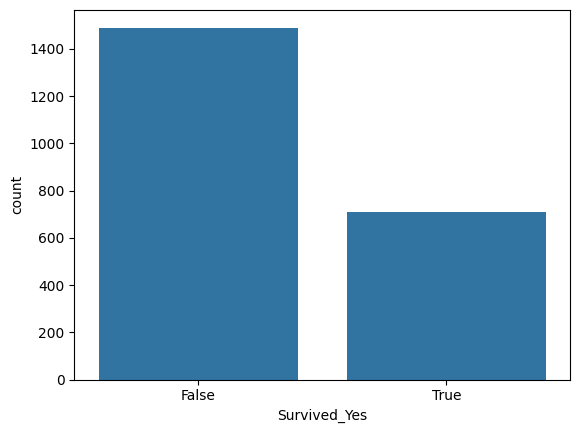

In [6]:

print(df_obj['Survived_Yes'].value_counts())
print( (df_obj['Survived_Yes'].value_counts()/ df_obj['Survived_Yes'].value_counts().sum()) * 100)

sns.countplot(data=df_obj, x='Survived_Yes')
df_obj.head()

In [7]:
# attr = df_obj.drop(['Survived_Yes','Survived_No'], axis=1)
attr = df_obj.drop(['Survived_Yes'], axis=1)  ### make sure 'Sruvived_no' is not part of the dataframe (drop_first=True)
target = df_obj['Survived_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [9]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[440   3]
 [135  83]]
              precision    recall  f1-score   support

       False       0.77      0.99      0.86       443
        True       0.97      0.38      0.55       218

    accuracy                           0.79       661
   macro avg       0.87      0.69      0.71       661
weighted avg       0.83      0.79      0.76       661



In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

## Stop here. Just showing data type conversion below

In [12]:
### converting data type from object to category ###

data = {'fruit': ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']}
df = pd.DataFrame(data)
print(df.dtypes )

# Convert the 'fruit' column to a categorical type
df['fruit'] = df['fruit'].astype('category')

# Convert the categorical data to integer codes
df['fruit_codes'] = df['fruit'].cat.codes

df.head(7)

fruit    object
dtype: object


,fruit,fruit_codes
0,apple,0
1,banana,1
2,apple,0
3,orange,2
4,banana,1
5,apple,0
